In [1]:
# import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from pathlib import Path
from collections import Counter
# Import the style from Matplotlib.
from matplotlib import style
import seaborn as sns

In [2]:
# Create a DataFrame for the healthcare-dataset-stroke-data.csv. 
file_path = Path("Resources/alzheimers_disease_data.csv")
alzheimer_df = pd.read_csv(file_path)
alzheimer_df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [3]:
#view df information and datatypes 

alzheimer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

---
### Data cleaning and preparation process 


In [4]:
# determine the number of rows and columns.
alzheimer_df_rc, alzheimer_df_cc = alzheimer_df.shape
print('Number of total rows:', alzheimer_df_rc)
print('Number of total columns:', alzheimer_df_cc)

Number of total rows: 2149
Number of total columns: 35


In [5]:
# Check all columns inside of the DataFrame
alzheimer_df.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
       'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis', 'DoctorInCharge'],
      dtype='object')

In [6]:
# Show missing values
print(alzheimer_df.isnull().sum())
print("Overall there are", sum(alzheimer_df.isnull().sum()), "missing values")

PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfu

In [7]:
# show duplicates
duplicate = alzheimer_df[alzheimer_df.duplicated()]
print("Duplicate Rows:", len(duplicate), "\n")

Duplicate Rows: 0 



In [8]:
# explore the 'x' columns
# alzheimer_df['x'].describe()

In [9]:
# Drop all rows with missing information 
alzheimer_df = alzheimer_df.dropna(how='any')

In [10]:
alzheimer_df.count()

PatientID                    2149
Age                          2149
Gender                       2149
Ethnicity                    2149
EducationLevel               2149
BMI                          2149
Smoking                      2149
AlcoholConsumption           2149
PhysicalActivity             2149
DietQuality                  2149
SleepQuality                 2149
FamilyHistoryAlzheimers      2149
CardiovascularDisease        2149
Diabetes                     2149
Depression                   2149
HeadInjury                   2149
Hypertension                 2149
SystolicBP                   2149
DiastolicBP                  2149
CholesterolTotal             2149
CholesterolLDL               2149
CholesterolHDL               2149
CholesterolTriglycerides     2149
MMSE                         2149
FunctionalAssessment         2149
MemoryComplaints             2149
BehavioralProblems           2149
ADL                          2149
Confusion                    2149
Disorientation

In [11]:
# print out columns and number of unique values
for col in alzheimer_df.columns:
    print(col, alzheimer_df[col].nunique())

PatientID 2149
Age 31
Gender 2
Ethnicity 4
EducationLevel 4
BMI 2149
Smoking 2
AlcoholConsumption 2149
PhysicalActivity 2149
DietQuality 2149
SleepQuality 2149
FamilyHistoryAlzheimers 2
CardiovascularDisease 2
Diabetes 2
Depression 2
HeadInjury 2
Hypertension 2
SystolicBP 90
DiastolicBP 60
CholesterolTotal 2149
CholesterolLDL 2149
CholesterolHDL 2149
CholesterolTriglycerides 2149
MMSE 2149
FunctionalAssessment 2149
MemoryComplaints 2
BehavioralProblems 2
ADL 2149
Confusion 2
Disorientation 2
PersonalityChanges 2
DifficultyCompletingTasks 2
Forgetfulness 2
Diagnosis 2
DoctorInCharge 1


In [12]:
alzheimer_df.to_csv('alzheimer_clean', index=False)

---
### Exploratory Data Analysis (EDA)



In [13]:
# Look at the stroke outcome value counts
alzheimer_counts = alzheimer_df['Diagnosis'].value_counts()
alzheimer_counts

Diagnosis
0    1389
1     760
Name: count, dtype: int64

# Visuals for Smoking, Alcohol Consumption, Cardiovascular Disease, and Diabetes

In [14]:
alzheimer_copy = alzheimer_df.copy()
alzheimer_copy

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,6895,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,...,0,0,4.492838,1,0,0,0,0,1,XXXConfid
2145,6896,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,...,0,1,9.204952,0,0,0,0,0,1,XXXConfid
2146,6897,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,...,0,0,5.036334,0,0,0,0,0,1,XXXConfid
2147,6898,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,...,0,0,3.785399,0,0,0,0,1,1,XXXConfid


In [15]:
# save categories to use ["Smoking", "AlcoholConsumption", "CardiovascularDisease","Diabetes","Diagnosis"]

anna_copy = alzheimer_copy[["Smoking", "AlcoholConsumption", "CardiovascularDisease","Diabetes","Diagnosis"]]
anna_copy

,Smoking,AlcoholConsumption,CardiovascularDisease,Diabetes,Diagnosis
0,0,13.297218,0,1,0
1,0,4.542524,0,0,0
2,0,19.555085,0,0,0
3,1,12.209266,0,0,0
4,0,18.454356,0,0,0
...,...,...,...,...,...
2144,0,1.561126,0,0,1
2145,0,18.767261,0,0,1
2146,0,4.594670,0,0,1
2147,0,8.674505,1,0,1


In [16]:
# change 0="No" and 1="Yes" in Smoking, CardiovascularDisease, Diabetes and Diagnosis for graphing
anna_copy["Smoking"] = anna_copy["Smoking"].replace({0:"No",1:"Yes"})
anna_copy["CardiovascularDisease"] = anna_copy["CardiovascularDisease"].replace({0:"No",1:"Yes"})
anna_copy["Diabetes"] = anna_copy["Diabetes"].replace({0:"No",1:"Yes"})
anna_copy["Diagnosis"] = anna_copy["Diagnosis"].replace({0:"No",1:"Yes"})
anna_copy

C:\Users\user\AppData\Local\Temp\ipykernel_13560\1538966528.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anna_copy["Smoking"] = anna_copy["Smoking"].replace({0:"No",1:"Yes"})
C:\Users\user\AppData\Local\Temp\ipykernel_13560\1538966528.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anna_copy["CardiovascularDisease"] = anna_copy["CardiovascularDisease"].replace({0:"No",1:"Yes"})
C:\Users\user\AppData\Local\Temp\ipykernel_13560\1538966528.py:4: SettingWithCopyWarning: 
A value is trying to be set o

,Smoking,AlcoholConsumption,CardiovascularDisease,Diabetes,Diagnosis
0,No,13.297218,No,Yes,No
1,No,4.542524,No,No,No
2,No,19.555085,No,No,No
3,Yes,12.209266,No,No,No
4,No,18.454356,No,No,No
...,...,...,...,...,...
2144,No,1.561126,No,No,Yes
2145,No,18.767261,No,No,Yes
2146,No,4.594670,No,No,Yes
2147,No,8.674505,Yes,No,Yes


## Visualizations: information will be split be their diagnosis and within there will be visualizations to see who said y/n to smoking, cvd and diabetes and then alcohol consumption will be split to see the distribution of alcohol consumption for each diagnosis

In [17]:
# splt the Dataframe based on Diagnosis
yes_alzheimers = anna_copy[anna_copy["Diagnosis"] == "Yes"]
no_alzheimers = anna_copy[anna_copy["Diagnosis"] == "No"]
no_alzheimers

,Smoking,AlcoholConsumption,CardiovascularDisease,Diabetes,Diagnosis
0,No,13.297218,No,Yes,No
1,No,4.542524,No,No,No
2,No,19.555085,No,No,No
3,Yes,12.209266,No,No,No
4,No,18.454356,No,No,No
...,...,...,...,...,...
2137,No,10.890948,No,No,No
2139,No,2.982747,No,No,No
2140,No,7.770687,Yes,No,No
2141,No,19.391766,No,No,No


In [18]:
yes_alzheimers

,Smoking,AlcoholConsumption,CardiovascularDisease,Diabetes,Diagnosis
7,No,13.723826,No,No,Yes
13,Yes,10.194706,No,No,Yes
15,No,8.116832,No,No,Yes
16,Yes,4.433961,Yes,No,Yes
17,Yes,4.161795,No,No,Yes
...,...,...,...,...,...
2143,Yes,9.308706,No,No,Yes
2144,No,1.561126,No,No,Yes
2145,No,18.767261,No,No,Yes
2146,No,4.594670,No,No,Yes


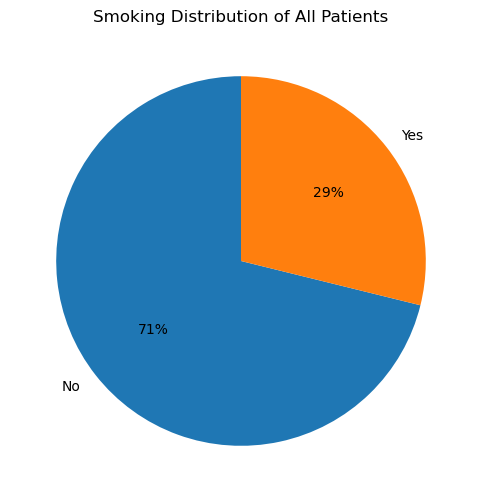

In [19]:
# create a pie graph for smoking 
yes_smoking_all = anna_copy.Smoking.value_counts()
plt.figure(figsize=(12,6))
plt.pie(yes_smoking_all, labels=yes_smoking_all.index, autopct="%.0f%%", startangle=90)
plt.title("Smoking Distribution of All Patients")
plt.show()

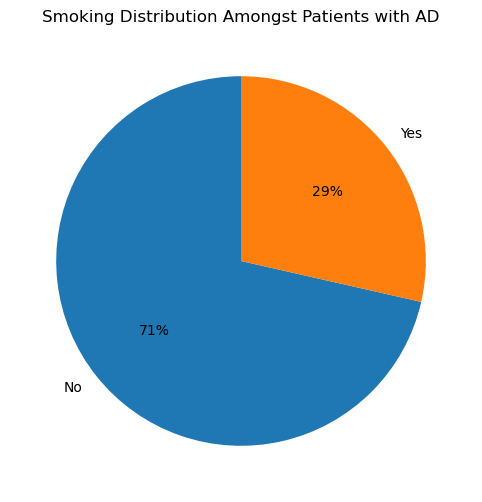

In [20]:
# create a pie graph for smoking with yes diagnosis
yes_smoking = yes_alzheimers.Smoking.value_counts()
plt.figure(figsize=(12,6))
plt.pie(yes_smoking, labels=yes_smoking.index, autopct="%.0f%%", startangle=90)
plt.title("Smoking Distribution Amongst Patients with AD")
plt.show()


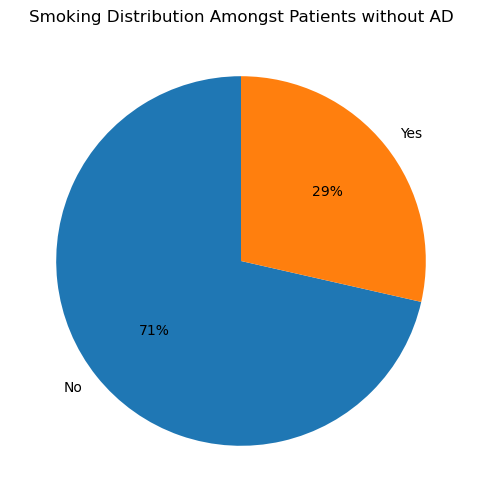

In [21]:
# create a pie graph for smoking with no diagnosis
no_smoking = no_alzheimers.Smoking.value_counts()
plt.figure(figsize=(12,6))
plt.pie(yes_smoking, labels=no_smoking.index, autopct="%.0f%%", startangle=90)
plt.title("Smoking Distribution Amongst Patients without AD")
plt.show()

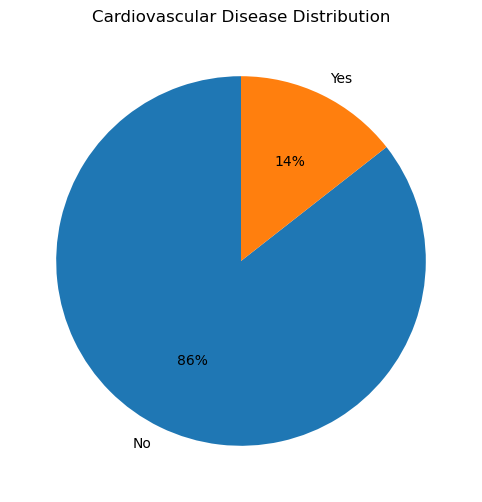

In [22]:
# create a pie graph for CardiovascularDisease with yes diagnosis
yes_cvd_all = anna_copy.CardiovascularDisease.value_counts()
plt.figure(figsize=(12,6))
plt.pie(yes_cvd_all, labels=yes_cvd_all.index, autopct="%.0f%%", startangle=90)
plt.title("Cardiovascular Disease Distribution")
plt.show()

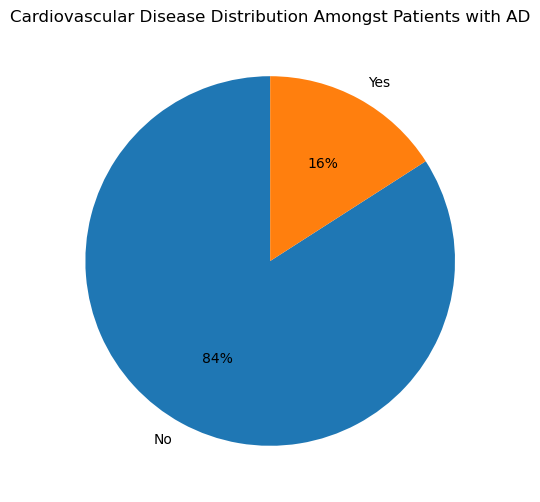

In [23]:
# create a pie graph for CardiovascularDisease with yes diagnosis
yes_cvd = yes_alzheimers.CardiovascularDisease.value_counts()
plt.figure(figsize=(12,6))
plt.pie(yes_cvd, labels=yes_cvd.index, autopct="%.0f%%", startangle=90)
plt.title("Cardiovascular Disease Distribution Amongst Patients with AD")
plt.show()

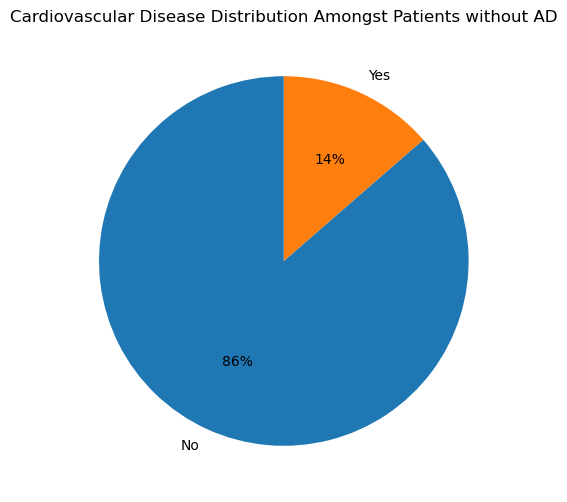

In [24]:
# create a pie graph for cardiovascular disease with no diagnosis
no_cvd = no_alzheimers.CardiovascularDisease.value_counts()
plt.figure(figsize=(12,6))
plt.pie(no_cvd, labels=no_cvd.index, autopct="%.0f%%", startangle=90)
plt.title("Cardiovascular Disease Distribution Amongst Patients without AD")
plt.show()

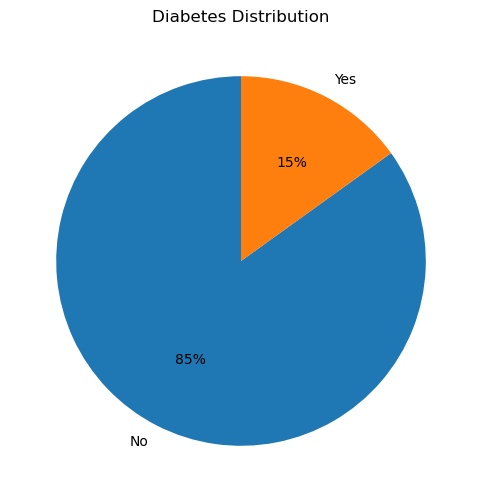

In [25]:
# create a pie graph for diabetes
yes_diabetes_all = anna_copy.Diabetes.value_counts()
plt.figure(figsize=(12,6))
plt.pie(yes_diabetes_all, labels=yes_diabetes_all.index, autopct="%.0f%%", startangle=90)
plt.title("Diabetes Distribution")
plt.show()

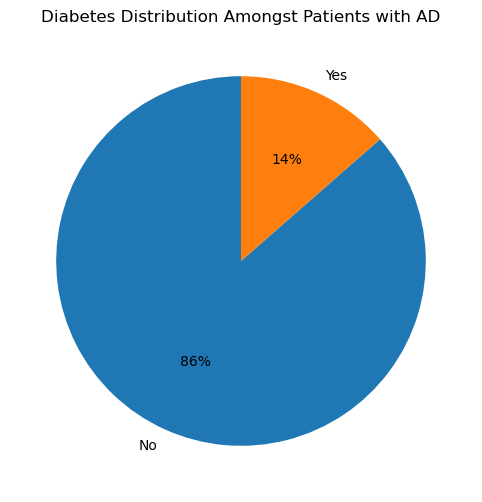

In [26]:
# create a pie graph for diabetes with yes diagnosis
yes_diabetes = yes_alzheimers.Diabetes.value_counts()
plt.figure(figsize=(12,6))
plt.pie(yes_diabetes, labels=yes_diabetes.index, autopct="%.0f%%", startangle=90)
plt.title("Diabetes Distribution Amongst Patients with AD")
plt.show()

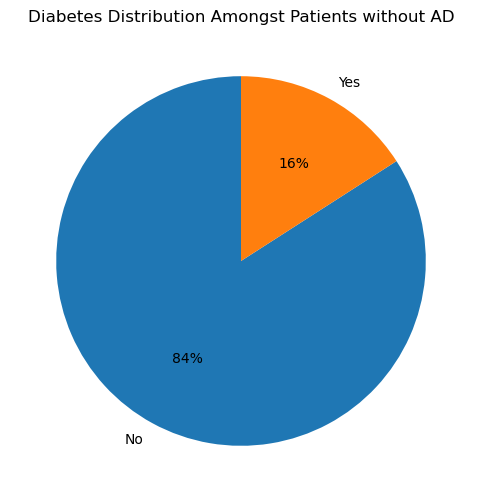

In [27]:
# create a pie graph for diabetes with no diagnosis
no_diabetes = no_alzheimers.Diabetes.value_counts()
plt.figure(figsize=(12,6))
plt.pie(no_diabetes, labels=no_diabetes.index, autopct="%.0f%%", startangle=90)
plt.title("Diabetes Distribution Amongst Patients without AD")
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_13560\1487155201.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yes_alzheimers["AlcoholConsumption_group"] = pd.cut(yes_alzheimers["AlcoholConsumption"], bins=bins, labels=labels, right=False)


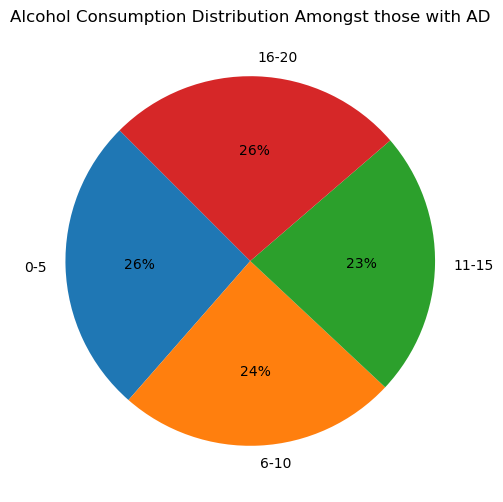

In [28]:
# build a bargraph to see the distribution of alcohol consumption with those that have been diagnosed with AD
bins = [0,5,10,15,20] 
labels = ["0-5","6-10","11-15","16-20"] 
yes_alzheimers["AlcoholConsumption_group"] = pd.cut(yes_alzheimers["AlcoholConsumption"], bins=bins, labels=labels, right=False) 
AlcoholConsumption_counts = yes_alzheimers["AlcoholConsumption_group"].value_counts().sort_index() 
plt.figure(figsize=(12,6)) 
plt.pie(AlcoholConsumption_counts, labels = AlcoholConsumption_counts.index, autopct="%.0f%%",startangle=135) 
plt.title("Alcohol Consumption Distribution Amongst those with AD") 
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_13560\2924675077.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_alzheimers["AlcoholConsumption_group"] = pd.cut(no_alzheimers["AlcoholConsumption"], bins=bins, labels=labels, right=False)


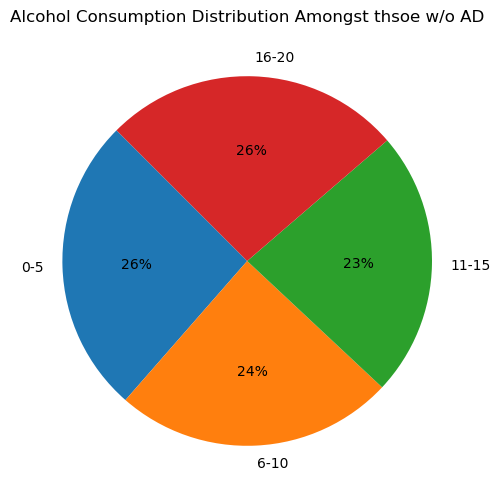

In [29]:
# build a bargraph to see the distribution of alcohol consumption with those that have no AD diagnosis
bins = [0,5,10,15,20] 
labels = ["0-5","6-10","11-15","16-20"] 
no_alzheimers["AlcoholConsumption_group"] = pd.cut(no_alzheimers["AlcoholConsumption"], bins=bins, labels=labels, right=False) 
AlcoholConsumption_counts_noAD = no_alzheimers["AlcoholConsumption_group"].value_counts().sort_index() 
plt.figure(figsize=(12,6)) 
plt.pie(AlcoholConsumption_counts, labels = AlcoholConsumption_counts.index, autopct="%.0f%%",startangle=135) 
plt.title("Alcohol Consumption Distribution Amongst thsoe w/o AD") 
plt.show()

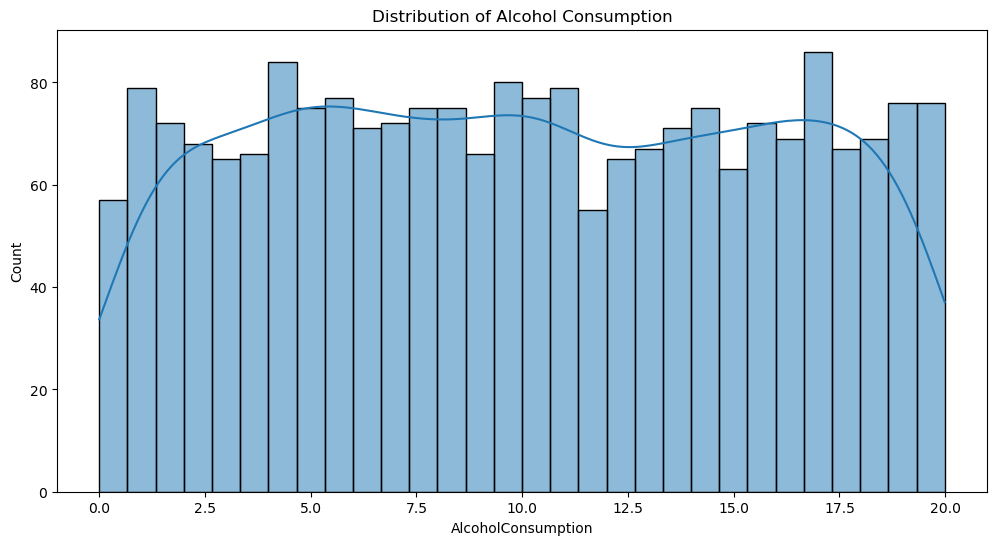

In [30]:
# create a seaborn chart to see if there's a trend of alcohol consumption using all of the patients
plt.figure(figsize=(12,6))
sns.histplot(data=anna_copy, x="AlcoholConsumption", kde=True, bins=30)
plt.title("Distribution of Alcohol Consumption")
plt.show()

# results:
No. of patients with AD: 760
No. of patients w/o AD: 1389

Smoking: 29% of patients that have and don't have AD smoke (220 and 402)
CVD: 16% of patients that have AD have CVD, 14% of those that don't have AD have CVD (122 and 194)
Diabetes: 14% of patients that have AD have diabetes, 16% of patients that don't have AD have diabetes (106 and 222)
AlcoholConsumption: no percentage difference between alcohol consumption rate amongst those diagnosed with and without AD

in conclusion: percentage wise, there is only about a 2% difference of those that have AD and have cardiovascular disease or diabetes than those that don't have AD with CVD seeing an increase while diabetes saw a decrease, percentage wise. Since the total number of those that don't have AD outnumber those that do, the percentage of each category is very similar. This implies that there is no correlation between having CVD or diabetes or smoking or drinking that increases or decreases the risk of having or getting AD

# Visualizations: now let's split the information be the y/n of each category and see the percentage disparity of those with or without AD

In [31]:
# Keep the yes of each category together
df_smoking_yes = anna_copy[anna_copy["Smoking"] == "Yes"]
df_cvd_yes = anna_copy[anna_copy["CardiovascularDisease"] == "Yes"]
df_diabetes_yes = anna_copy[anna_copy["Diabetes"] == "Yes"]

# Keep the no of each category together
df_smoking_no = anna_copy[anna_copy["Smoking"] == "No"]
df_cvd_no = anna_copy[anna_copy["CardiovascularDisease"] == "No"]
df_diabetes_no = anna_copy[anna_copy["Diabetes"] == "No"]

In [32]:
df_smoking_yes

,Smoking,AlcoholConsumption,CardiovascularDisease,Diabetes,Diagnosis
3,Yes,12.209266,No,No,No
6,Yes,0.646047,No,No,No
9,Yes,16.028688,Yes,No,No
11,Yes,19.300183,No,Yes,No
13,Yes,10.194706,No,No,Yes
...,...,...,...,...,...
2125,Yes,17.105628,No,No,Yes
2127,Yes,13.076450,No,No,No
2130,Yes,2.328341,Yes,No,Yes
2134,Yes,10.327728,No,No,No


In [33]:
df_smoking_no

,Smoking,AlcoholConsumption,CardiovascularDisease,Diabetes,Diagnosis
0,No,13.297218,No,Yes,No
1,No,4.542524,No,No,No
2,No,19.555085,No,No,No
4,No,18.454356,No,No,No
5,No,4.140144,No,Yes,No
...,...,...,...,...,...
2144,No,1.561126,No,No,Yes
2145,No,18.767261,No,No,Yes
2146,No,4.594670,No,No,Yes
2147,No,8.674505,Yes,No,Yes


In [34]:
df_cvd_yes

,Smoking,AlcoholConsumption,CardiovascularDisease,Diabetes,Diagnosis
9,Yes,16.028688,Yes,No,No
14,No,2.175780,Yes,Yes,No
16,Yes,4.433961,Yes,No,Yes
20,No,4.192896,Yes,No,Yes
29,No,8.042180,Yes,Yes,No
...,...,...,...,...,...
2115,No,7.361620,Yes,No,No
2130,Yes,2.328341,Yes,No,Yes
2136,No,13.980834,Yes,Yes,Yes
2140,No,7.770687,Yes,No,No


In [35]:
df_cvd_no

,Smoking,AlcoholConsumption,CardiovascularDisease,Diabetes,Diagnosis
0,No,13.297218,No,Yes,No
1,No,4.542524,No,No,No
2,No,19.555085,No,No,No
3,Yes,12.209266,No,No,No
4,No,18.454356,No,No,No
...,...,...,...,...,...
2143,Yes,9.308706,No,No,Yes
2144,No,1.561126,No,No,Yes
2145,No,18.767261,No,No,Yes
2146,No,4.594670,No,No,Yes


In [36]:
df_diabetes_yes

,Smoking,AlcoholConsumption,CardiovascularDisease,Diabetes,Diagnosis
0,No,13.297218,No,Yes,No
5,No,4.140144,No,Yes,No
11,Yes,19.300183,No,Yes,No
14,No,2.175780,Yes,Yes,No
25,No,0.953869,No,Yes,No
...,...,...,...,...,...
2102,No,6.131512,No,Yes,Yes
2118,Yes,12.797561,No,Yes,No
2121,No,4.226343,No,Yes,Yes
2132,No,8.264128,No,Yes,Yes


In [37]:
df_diabetes_no

,Smoking,AlcoholConsumption,CardiovascularDisease,Diabetes,Diagnosis
1,No,4.542524,No,No,No
2,No,19.555085,No,No,No
3,Yes,12.209266,No,No,No
4,No,18.454356,No,No,No
6,Yes,0.646047,No,No,No
...,...,...,...,...,...
2144,No,1.561126,No,No,Yes
2145,No,18.767261,No,No,Yes
2146,No,4.594670,No,No,Yes
2147,No,8.674505,Yes,No,Yes


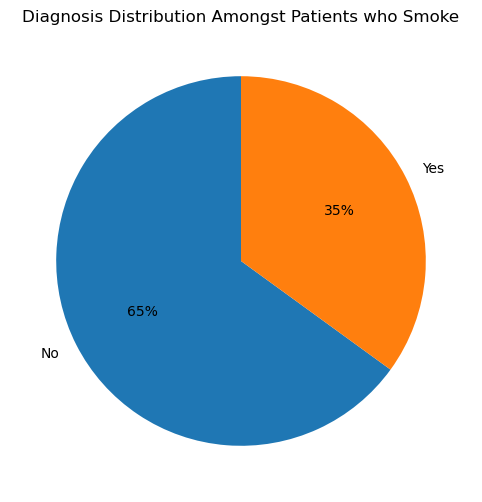

In [38]:
# recreate the same graphs but the pie graphs display the diagnosis
# create a pie graph for diagnosis with yes smoking
ad_smokingyes = df_smoking_yes.Diagnosis.value_counts()
plt.figure(figsize=(12,6))
plt.pie(ad_smokingyes, labels=ad_smokingyes.index, autopct="%.0f%%", startangle=90)
plt.title("Diagnosis Distribution Amongst Patients who Smoke")
plt.show()

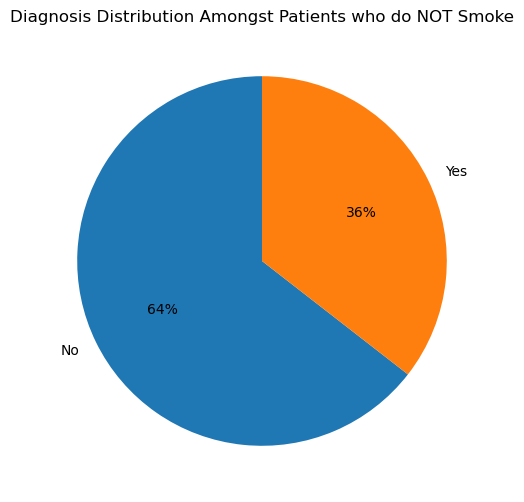

In [39]:
# create a pie graph for diagnosis with no smoking
ad_smokingno = df_smoking_no.Diagnosis.value_counts()
plt.figure(figsize=(12,6))
plt.pie(ad_smokingno, labels=ad_smokingno.index, autopct="%.0f%%", startangle=90)
plt.title("Diagnosis Distribution Amongst Patients who do NOT Smoke")
plt.show()

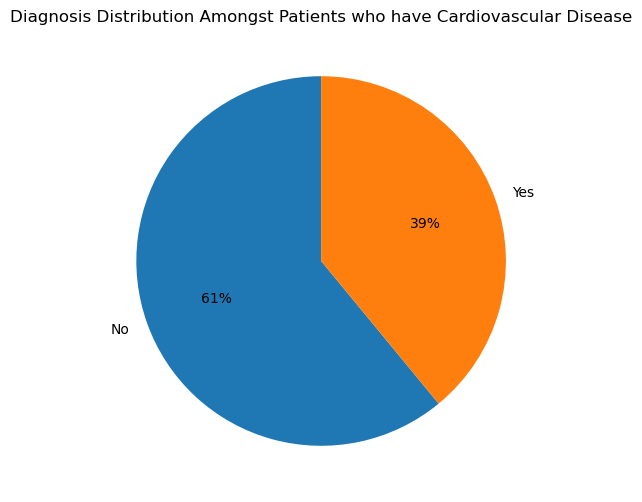

In [40]:
# create a pie graph for diagnosis with yes cvd
ad_cvdyes = df_cvd_yes.Diagnosis.value_counts()
plt.figure(figsize=(12,6))
plt.pie(ad_cvdyes, labels=ad_cvdyes.index, autopct="%.0f%%", startangle=90)
plt.title("Diagnosis Distribution Amongst Patients who have Cardiovascular Disease")
plt.show()

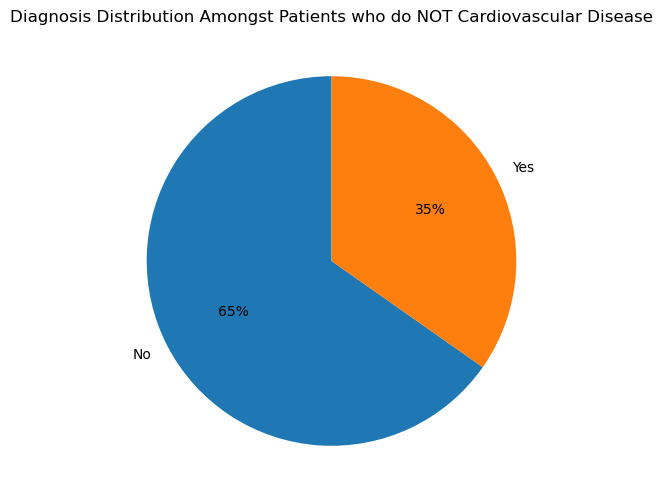

In [41]:
# create a pie graph for diagnosis with no cvd
ad_cvdno = df_cvd_no.Diagnosis.value_counts()
plt.figure(figsize=(12,6))
plt.pie(ad_cvdno, labels=ad_cvdno.index, autopct="%.0f%%", startangle=90)
plt.title("Diagnosis Distribution Amongst Patients who do NOT Cardiovascular Disease")
plt.show()

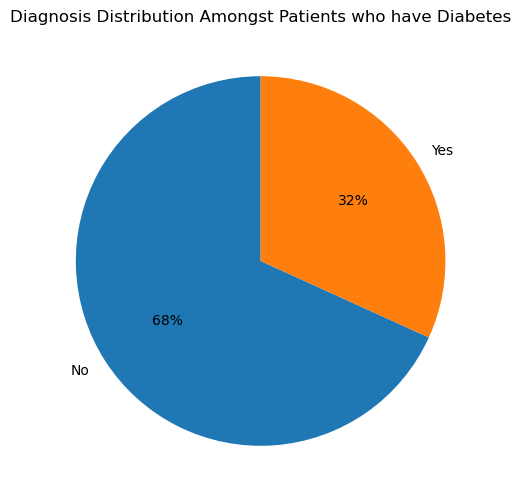

In [42]:
# create a pie graph for diagnosis with yes diabetes
ad_diabetesyes = df_diabetes_yes.Diagnosis.value_counts()
plt.figure(figsize=(12,6))
plt.pie(ad_diabetesyes, labels=ad_diabetesyes.index, autopct="%.0f%%", startangle=90)
plt.title("Diagnosis Distribution Amongst Patients who have Diabetes")
plt.show()

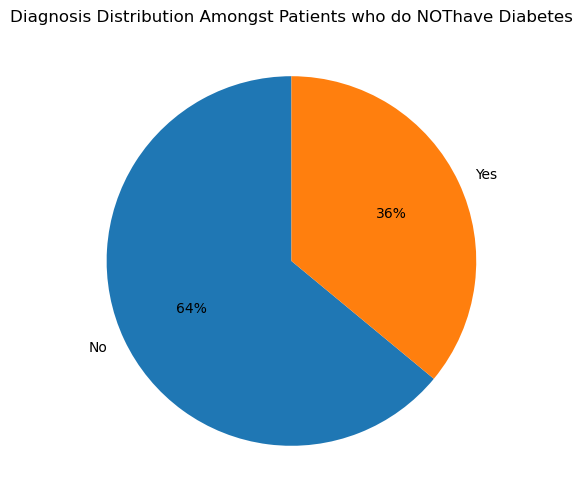

In [43]:
# create a pie graph for diagnosis with yes smoking
ad_diabetesno = df_diabetes_no.Diagnosis.value_counts()
plt.figure(figsize=(12,6))
plt.pie(ad_diabetesno, labels=ad_diabetesno.index, autopct="%.0f%%", startangle=90)
plt.title("Diagnosis Distribution Amongst Patients who do NOThave Diabetes")
plt.show()

Smoking:
Total no. of smokers: 620
Total no. of non-smokers: 1529
35% of smokers and 36% of non-smokers have AD (217 and 550)

CVD:
Total no. with CVD: 310
Total no. of those without CVD: 1839
39% of those with CVD and 35% of those without CVD have AD (121 and 643)

Diabetes:
Total no. with Diabetes: 324
Totla no. without Diabetes: 1825
32% of thsoe with diabetes and 36% of those without diabetes have AD (104 and 657)

analysis: looking at the percentages alone, it shows that there are 1% more of non-smokers that have AD than those that do smoke, there are 4% more of non-diabetics that have AD than those that have diabetes, and 4% less suffering from cardiovascular disease have AD than those that do not suffer. However, looking at the count, there is still a large amount of people that are diagnosed with AD that do not smoke, not diabetic or have cardiovascular disease

conclusion: percentage wise, there is not much of a significant difference that can be said that having diabetes or cardiovascular disease or being a smoker adds to the likelihood of developing Alzheimer's Disease. However, there is still a large disparity between the number of people that have been diagnosed with Alzheimer's disease that do not smoke, not have diabetes or not have cardiovascular disease.
